In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.ticker as mticker
from matplotlib.colors import LogNorm

plt.rcParams.update({"font.size": 16})
plt.style.use(hep.style.CMS)
hep.style.use("CMS")
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_powerlimits((-3, 3))

from typing import List
import os

In [2]:
BDT_RANGE = [0.97, 1.00, 15]
BB_RANGE = [0.97, 1.00, 15]
plot_dir = '../../../plots/Scans/Jul28/'
os.system(f"mkdir -p {plot_dir}")

0

In [3]:
signs = pd.read_csv('../../../../cards/04_07_scan/signs.csv')
signs

,BDT Cut,Txbb Cut,Sign.,Limit
0,0.97,0.970,0.008524,238.5
1,0.97,0.972,0.008568,237.5
2,0.97,0.974,0.008861,230.5
3,0.97,0.976,0.009010,226.5
4,0.97,0.978,0.012244,168.5
...,...,...,...,...
239,1.00,0.986,0.000000,1583.0
240,1.00,0.988,0.000000,1459.0
241,1.00,0.990,0.000000,1332.0
242,1.00,0.992,0.000210,1212.0


In [4]:
def to_image(x_range: List[float], y_range: List[float], pixels: np.ndarray):
    """
    ranges: [x_min, x_max (exclusive), # bins]
    """

    im = np.zeros((x_range[2], y_range[2])) - 1  # missing values will show up blank in the image

    for pixel in pixels:
        x = (pixel[0] - x_range[0]) / (x_range[1] - x_range[0]) * x_range[2]
        y = x_range[2] - ((pixel[1] - y_range[0]) / (y_range[1] - y_range[0]) * y_range[2]) - 1
        if x >= x_range[2] or y < 0:
            continue
        im[int(y)][int(x)] = pixel[2] + 1e-12

    return im


In [5]:
ak8_signs = to_image(BDT_RANGE, BB_RANGE, signs.values[:, :3])
ak8_limits = to_image(BDT_RANGE, BB_RANGE, np.concatenate((signs.values[:, :2], signs.values[:, 3:4]), axis=1))

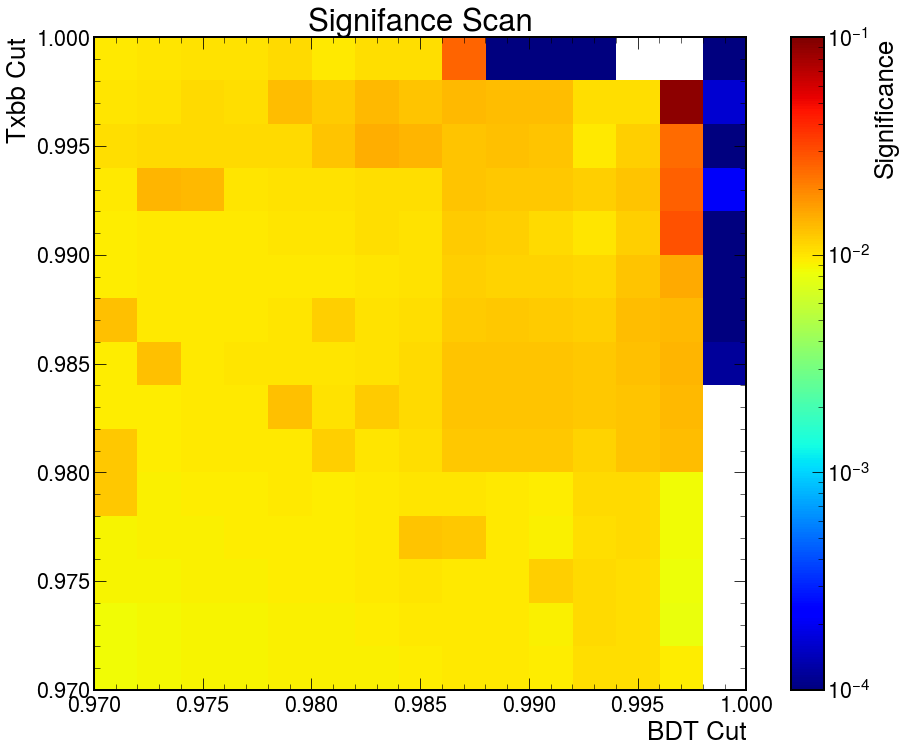

In [6]:
plt.figure(figsize=(16, 12))
plt.imshow(ak8_signs, extent=[BDT_RANGE[0], BDT_RANGE[1], BB_RANGE[0], BB_RANGE[1]], norm=LogNorm(vmin=0.0001, vmax=0.1), cmap='jet')
plt.colorbar(label='Significance')
plt.xlabel("BDT Cut")
plt.ylabel("Txbb Cut")
plt.title("Signifance Scan")
plt.savefig(f"{plot_dir}/sigscan.pdf", bbox_inches='tight')

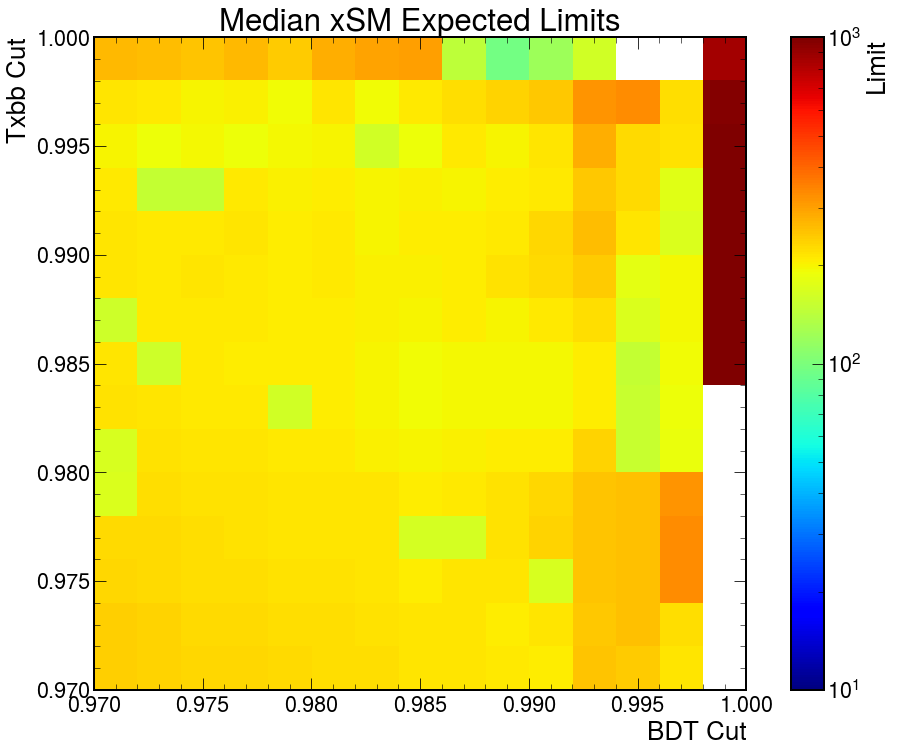

In [7]:
plt.figure(figsize=(16, 12))
plt.imshow(ak8_limits, extent=[BDT_RANGE[0], BDT_RANGE[1], BB_RANGE[0], BB_RANGE[1]], norm=LogNorm(vmin=10, vmax=1000), cmap='jet')
plt.colorbar(label='Limit')
plt.xlabel("BDT Cut")
plt.ylabel("Txbb Cut")
plt.title("Median xSM Expected Limits")
plt.savefig(f"{plot_dir}/limits.pdf", bbox_inches='tight')

In [81]:
signs[-40:-13]

,BDT Cut,Txbb Cut,Sign.,Limit
204,0.994,0.994,0.011663,226.5
205,0.994,0.996,0.010600,333.0
206,0.994,1.000,0.000129,767.0
207,0.996,0.970,0.009412,214.0
208,0.996,0.972,0.007920,224.0
209,0.996,0.974,0.008152,328.0
210,0.996,0.976,0.008398,330.5
211,0.996,0.978,0.008542,321.5
212,0.996,0.980,0.013334,186.0
213,0.996,0.982,0.013688,189.5
